In [150]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# 1 数据预处理

In [2]:
# 构建 用户名id —— 用户新id(从1开始)
f_user= open('./data/users.txt', encoding='utf-8')
line = f_user.readline().strip()
user_list = []
user_list.append(line)
while line:
    line = f_user.readline().strip()
    if line != '':
        user_list.append(line)
f_user.close()
user_dict = {}
for i in range(0, len(user_list)):
    user_dict[user_list[i]] = i

print(len(user_dict))

10000


In [3]:
# 构建用户行为矩阵（训练用）
# 注意由于已经训练完成,除非初次完整运行本项目，本代码无需二次运行
pd_user_train = pd.DataFrame(np.zeros([10000, 10000], int))

f_train = open('./data/netflix_train.txt')
f_train_data = f_train.readlines()
for line in f_train_data:
    temp_list = line.split(" ")
    pd_user_train.iloc[user_dict[temp_list[0]], int(temp_list[1]) - 1] = int(temp_list[2])

pd_user_train

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,0,2,1,1,1,2,1,0,1,...,2,1,0,1,1,2,1,1,1,2
1,1,0,2,0,1,2,1,0,0,0,...,0,1,1,1,0,2,1,1,2,1
2,0,1,0,1,0,1,0,1,0,1,...,1,1,0,0,0,1,1,1,1,1
3,5,0,0,3,5,4,3,4,3,4,...,5,3,0,4,5,5,5,4,0,5
4,5,0,4,3,5,4,3,0,0,3,...,5,0,5,4,4,5,4,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# 将上述表格保存到文件，方便后续读取
# 注意由于已经训练完成,除非初次完整运行本项目，本代码无需二次运行
pd_user_train_output = './data/user_train.csv'
pd_user_train.to_csv(pd_user_train_output, sep=',', index=False, header=False)

In [3]:
user_train = pd.read_csv("./data/user_train.csv", header=None)
user_train.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,0,2,1,1,1,2,1,0,1,...,2,1,0,1,1,2,1,1,1,2
1,1,0,2,0,1,2,1,0,0,0,...,0,1,1,1,0,2,1,1,2,1
2,0,1,0,1,0,1,0,1,0,1,...,1,1,0,0,0,1,1,1,1,1
3,5,0,0,3,5,4,3,4,3,4,...,5,3,0,4,5,5,5,4,0,5
4,5,0,4,3,5,4,3,0,0,3,...,5,0,5,4,4,5,4,4,0,4


In [11]:
# 构建用户行为矩阵（测试用）
# 注意由于已经训练完成,除非初次完整运行本项目，本代码无需二次运行
pd_user_test = pd.DataFrame(np.zeros([10000, 10000], int))

f_test = open('./data/netflix_test.txt')
f_test_data = f_test.readlines()
for line in f_test_data:
    temp_list = line.split(" ")
    pd_user_test.iloc[user_dict[temp_list[0]], int(temp_list[1]) - 1] = int(temp_list[2])

pd_user_test

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,2,0,0,0,1,1,2,...,1,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,4,5,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,3,0
4,0,4,0,0,0,0,0,3,0,0,...,0,3,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# 将上述表格保存到文件，方便后续读取
# 注意由于已经训练完成,除非初次完整运行本项目，本代码无需二次运行
pd_user_test_output = './data/user_test.csv'
pd_user_test.to_csv(pd_user_test_output, sep=',', index=False, header=False)

In [4]:
user_test = pd.read_csv("./data/user_test.csv", header=None)
user_test.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,2,0,0,0,1,1,2,...,1,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,4,5,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,3,0
4,0,4,0,0,0,0,0,3,0,0,...,0,3,0,0,0,0,0,0,0,0


# 2 协同过滤

In [5]:
# 设置维度大小
level = 2000

In [6]:
# 计算相似度
def sim(user1, user2):
    '''
    计算两个用户向量的余弦相似度
    适配本环境请输入：user_train.iloc[0,:].values,user_train.iloc[1,:].values
    :param user1: 用户1对所有电影打分的向量
    :param user2: 用户2对所用电影打分的向量
    :return: 相似度
    '''
    xy = sum(np.multiply(user1, user2))
    x_v = math.sqrt(sum(x**2 for x in user1))
    y_v = math.sqrt(sum(x**2 for x in user2))
    ans = 0.0
    fenmu = x_v * y_v
    if fenmu != 0:
        ans = xy / fenmu
    return ans
# 函数测试
sim(user_train.iloc[0,:].values, user_train.iloc[1,:].values)

0.6375199878464465

In [13]:
# 计算相似矩阵
# 注意由于已经训练完成,除非初次完整运行本项目，本代码无需二次运行
pd_user_sim = pd.DataFrame(np.zeros([level, level], int))

for i in range(0, level):
    for j in range(i + 1, level):
        pd_user_sim.iloc[i, j] = sim(user_train.iloc[i,:].values, user_train.iloc[j,:].values)
        print(i, j, pd_user_sim.iloc[i, j])
        pd_user_sim.iloc[j, i] = pd_user_sim.iloc[i, j]

pd_user_sim.iloc[0:10, 0:10]

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.637520,0.589112,0.645917,0.610410,0.556041,0.485405,0.485914,0.461615,0.493266
1,0.637520,0.000000,0.622332,0.672795,0.657799,0.520011,0.533986,0.486659,0.520652,0.502750
2,0.589112,0.622332,0.000000,0.630058,0.612625,0.479487,0.501114,0.456102,0.518732,0.500384
3,0.645917,0.672795,0.630058,0.000000,0.733967,0.496248,0.555380,0.480652,0.530741,0.526780
4,0.610410,0.657799,0.612625,0.733967,0.000000,0.483486,0.562568,0.469293,0.550004,0.522992
5,0.556041,0.520011,0.479487,0.496248,0.483486,0.000000,0.413856,0.457058,0.400203,0.412339
6,0.485405,0.533986,0.501114,0.555380,0.562568,0.413856,0.000000,0.426888,0.534465,0.478501
7,0.485914,0.486659,0.456102,0.480652,0.469293,0.457058,0.426888,0.000000,0.420089,0.383643
8,0.461615,0.520652,0.518732,0.530741,0.550004,0.400203,0.534465,0.420089,0.000000,0.435907
9,0.493266,0.502750,0.500384,0.526780,0.522992,0.412339,0.478501,0.383643,0.435907,0.000000


In [15]:
# 并行优化，计算相似矩阵（方法1）
# 注意由于已经训练完成,除非初次完整运行本项目，本代码无需二次运行
# 该代码和上述串行结果一致，只需要跑一种方法
pd_user_sim = pd.DataFrame(np.ones([level, level], float))
from joblib import Parallel, delayed

def para_fuc(i, j):
    pd_user_sim.iloc[i, j] = sim(user_train.iloc[i,:].values, user_train.iloc[j,:].values)
    pd_user_sim.iloc[j, i] = pd_user_sim.iloc[i, j]

Parallel(n_jobs=16)(delayed(para_fuc)(i, j) for i in range(0, 10) for j in range(i + 1, 10))

pd_user_sim.iloc[0:10, 0:10]

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.637520,0.589112,0.645917,0.610410,0.556041,0.485405,0.485914,0.461615,0.493266
1,0.637520,0.000000,0.622332,0.672795,0.657799,0.520011,0.533986,0.486659,0.520652,0.502750
2,0.589112,0.622332,0.000000,0.630058,0.612625,0.479487,0.501114,0.456102,0.518732,0.500384
3,0.645917,0.672795,0.630058,0.000000,0.733967,0.496248,0.555380,0.480652,0.530741,0.526780
4,0.610410,0.657799,0.612625,0.733967,0.000000,0.483486,0.562568,0.469293,0.550004,0.522992
5,0.556041,0.520011,0.479487,0.496248,0.483486,0.000000,0.413856,0.457058,0.400203,0.412339
6,0.485405,0.533986,0.501114,0.555380,0.562568,0.413856,0.000000,0.426888,0.534465,0.478501
7,0.485914,0.486659,0.456102,0.480652,0.469293,0.457058,0.426888,0.000000,0.420089,0.383643
8,0.461615,0.520652,0.518732,0.530741,0.550004,0.400203,0.534465,0.420089,0.000000,0.435907
9,0.493266,0.502750,0.500384,0.526780,0.522992,0.412339,0.478501,0.383643,0.435907,0.000000


In [57]:
# 并行优化，计算相似矩阵（方法2）
# 注意由于已经训练完成,除非初次完整运行本项目，本代码无需二次运行
# 该代码和上述串行结果一致，只需要跑一种方法
from multiprocessing import Pool

def para_fuc(i):
    for j in range(i + 1, level):
        pd_user_sim.iloc[i, j] = sim(user_train.iloc[i,:].values, user_train.iloc[j,:].values)
        pd_user_sim.iloc[j, i] = pd_user_sim.iloc[i, j]

pool = Pool()
id = list(range(1, level))
pool.map(para_fuc, id)
pool.close()
pool.join()

pd_user_sim.iloc[0:10, 0:10]

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.637520,0.589112,0.645917,0.610410,0.556041,0.485405,0.485914,0.461615,0.493266
1,0.637520,0.000000,0.622332,0.672795,0.657799,0.520011,0.533986,0.486659,0.520652,0.502750
2,0.589112,0.622332,0.000000,0.630058,0.612625,0.479487,0.501114,0.456102,0.518732,0.500384
3,0.645917,0.672795,0.630058,0.000000,0.733967,0.496248,0.555380,0.480652,0.530741,0.526780
4,0.610410,0.657799,0.612625,0.733967,0.000000,0.483486,0.562568,0.469293,0.550004,0.522992
5,0.556041,0.520011,0.479487,0.496248,0.483486,0.000000,0.413856,0.457058,0.400203,0.412339
6,0.485405,0.533986,0.501114,0.555380,0.562568,0.413856,0.000000,0.426888,0.534465,0.478501
7,0.485914,0.486659,0.456102,0.480652,0.469293,0.457058,0.426888,0.000000,0.420089,0.383643
8,0.461615,0.520652,0.518732,0.530741,0.550004,0.400203,0.534465,0.420089,0.000000,0.435907
9,0.493266,0.502750,0.500384,0.526780,0.522992,0.412339,0.478501,0.383643,0.435907,0.000000


In [14]:
# 将上述表格保存到文件，方便后续读取
# 注意由于已经训练完成,除非初次完整运行本项目，本代码无需二次运行
pd_user_sim_output = './data/user_sim.csv'
pd_user_sim.to_csv(pd_user_sim_output, sep=',', index=False, header=False)

In [9]:
pd_user_sim = pd.read_csv("./data/user_sim.csv", header=None)
pd_user_sim.iloc[0:10, 0:10]

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.637520,0.589112,0.645917,0.610410,0.556041,0.485405,0.485914,0.461615,0.493266
1,0.637520,0.000000,0.622332,0.672795,0.657799,0.520011,0.533986,0.486659,0.520652,0.502750
2,0.589112,0.622332,0.000000,0.630058,0.612625,0.479487,0.501114,0.456102,0.518732,0.500384
3,0.645917,0.672795,0.630058,0.000000,0.733967,0.496248,0.555380,0.480652,0.530741,0.526780
4,0.610410,0.657799,0.612625,0.733967,0.000000,0.483486,0.562568,0.469293,0.550004,0.522992
5,0.556041,0.520011,0.479487,0.496248,0.483486,0.000000,0.413856,0.457058,0.400203,0.412339
6,0.485405,0.533986,0.501114,0.555380,0.562568,0.413856,0.000000,0.426888,0.534465,0.478501
7,0.485914,0.486659,0.456102,0.480652,0.469293,0.457058,0.426888,0.000000,0.420089,0.383643
8,0.461615,0.520652,0.518732,0.530741,0.550004,0.400203,0.534465,0.420089,0.000000,0.435907
9,0.493266,0.502750,0.500384,0.526780,0.522992,0.412339,0.478501,0.383643,0.435907,0.000000


In [21]:
# 计算某用户对某电影的预测评分
def predict(userid, movieid):
    '''
    评分预测
    :param userid: 用户的id
    :param movieid: 电影的id
    :return: 预测评分
    '''
    score = 0
    for i in range(0, level): # 因为上述定义中，自己和自己的相似性为0，所以这里自己参与运算，贡献为0，不影响最终结果，所以不需要考虑i==userid的情况
        score += pd_user_sim.iloc[userid, i] * user_train.iloc[i, movieid]
    score /= sum(pd_user_sim.iloc[userid, :])
    return round(score)
# 函数测试
predict(0, 29)

2

In [56]:
# 预测评分
pd_user_pre = pd.DataFrame(np.zeros([level, level], int))

for i in range(0, level):
    for j in range(0, level):
        pd_user_pre.iloc[i, j] = predict(i, j)

pd_user_pre.iloc[0:10, 0:10]

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,1,0
1,0,1,0,2,0,0,0,1,1,2
2,1,0,1,0,1,0,1,0,0,0
3,0,4,5,0,0,0,0,0,0,0
4,0,4,0,0,0,0,0,3,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,2,0,0
7,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


In [41]:
# 将上述表格保存到文件，方便后续读取
# 注意由于已经训练完成,除非初次完整运行本项目，本代码无需二次运行
pd_user_pre_output = './data/user_pre.csv'
pd_user_pre.to_csv(pd_user_pre_output, sep=',', index=False, header=False)

In [55]:
pd_user_pre = pd.read_csv("./data/user_pre.csv", header=None)
pd_user_pre.iloc[0:10, 0:10]

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,1,0
1,0,1,0,2,0,0,0,1,1,2
2,1,0,1,0,1,0,1,0,0,0
3,0,4,5,0,0,0,0,0,0,0
4,0,4,0,0,0,0,0,3,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,2,0,0
7,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


In [53]:
# 定义均方根误差函数
def RMSE():
    Sum = 0.0
    for i in range(0, level):
        Sum += sum(x**2 for x in (user_test.iloc[i, 0:level].values - pd_user_pre.iloc[i, 0:level].values))
    ans = math.sqrt(Sum / (level * level))
    return ans

In [54]:
# 测试预测效果
print(RMSE())

0.4058660493315498


In [83]:
# 计算基线预测效果
def RMSE_base():
    Sum = 0.0
    for i in range(0, level):
        Sum += sum(x**2 for x in (user_test.iloc[i, 0:level].values))
    ans = math.sqrt(Sum / (level * level))
    return ans
print(RMSE_base())

0.5529905062476208


In [82]:
# 计算基线预测效果:全0-全5
def RMSE_base(all_value):
    Sum = 0.0
    for i in range(0, level):
        Sum += sum(x**2 for x in (user_test.iloc[i, 0:level].values - np.array([all_value] * level)))
    ans = math.sqrt(Sum / (level * level))
    return ans

baseline = pd.DataFrame()
for all_value in range(0, 6):
    baseline[all_value] = [RMSE_base(all_value)]
print(baseline)

          0         1         2         3         4         5
0  0.552991  1.067272  1.993074  2.967426  3.954603  4.946934


In [85]:
# 计算基线预测效果:随机
def RMSE_base():
    Sum = 0.0
    for i in range(0, level):
        Sum += sum(x**2 for x in (user_test.iloc[i, 0:level].values - np.random.randint(0, 6, size=level)))
    ans = math.sqrt(Sum / (level * level))
    return ans
print(RMSE_base())

3.009578292718101


# 3 基于梯度下降的矩阵分解

In [123]:
# 超参数设定
K = 50
Lambda = 0.01
a = 1e-5
max_delta_j = 10
max_loop = 20

# 定义数据结构
U = pd.DataFrame(np.full([level, K], 1.0 / K, dtype=float))
V = pd.DataFrame(np.ones([level, K], dtype=float))
A = pd.DataFrame(np.zeros([level, level]))
X = pd.DataFrame(user_test.iloc[0:level, 0:level])
X.iloc[0:10, 0:10]

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,1,0
1,0,1,0,2,0,0,0,1,1,2
2,1,0,1,0,1,0,1,0,0,0
3,0,4,5,0,0,0,0,0,0,0
4,0,4,0,0,0,0,0,3,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,2,0,0
7,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


In [105]:
# 计算指示矩阵A
for i in range(0, level):
    for j in range(0, level):
        if user_test.iloc[i, j] == 0:
            A.iloc[i, j] = 0
        else:
            A.iloc[i, j] = 1
A.iloc[1:10, 1:10]

,1,2,3,4,5,6,7,8,9
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
# 定义相关函数
# 矩阵的Frobenius范数计算函数
def F(df):
    Sum = 0.0
    for i in range(0, len(df)):
        Sum = Sum + sum(x**2 for x in df.iloc[i, :].values)
    return math.sqrt(Sum)

In [157]:
# U的导数
def dU(Lambda):
    UV = U.dot(V.T)
    UV_X = UV - X
    hadama = A * UV_X
    hadama_V = hadama.dot(V)
    return hadama_V + 2 * Lambda * U

In [158]:
# V的导数
def dV(Lambda):
    UV = U.dot(V.T)
    UV_X = UV - X
    hadama = A * UV_X
    hadama_U = (hadama.T).dot(U)
    return hadama_U + 2 * Lambda * V

In [159]:
# 目标函数J
def J(Lambda):
    UV = U.dot(V.T)
    X_UV = X - UV
    hadama = A * X_UV
    return 0.5 * F(hadama) + Lambda * F(U) + Lambda * F(V)

In [129]:
# 测试集RMSE
def RMSE_test():
    X2 = U.dot(V.T)
    Sum = 0.0
    for i in range(0, level):
        Sum += sum(x**2 for x in (X.iloc[i, 0:level].values - X2.iloc[i, 0:level].values))
    ans = math.sqrt(Sum / (level * level))
    return ans

In [139]:
# 迭代算法1
time = 0
result = pd.DataFrame(np.zeros([max_loop, 3]))
while time < max_loop:
    DU = dU(Lambda)
    DV = dV(Lambda)
    U = U - a * DU
    V = V - a * DV
    temp_J = J(Lambda)
    temp_RMSE_test = RMSE_test()
    result.iloc[time, :] = [time, temp_J, temp_RMSE_test]
    time = time + 1
result

,0,1,2
0,0.0,159.214784,3.293009
1,1.0,159.209447,3.293057
2,2.0,159.204118,3.293104
3,3.0,159.198796,3.293149
4,4.0,159.193481,3.293193
...,...,...,...
195,195.0,158.271271,3.293587
196,196.0,158.266859,3.293576
197,197.0,158.262450,3.293564
198,198.0,158.258046,3.293553


In [168]:
# 迭代算法2
time = 0
max_delta_j = 0.01
delta_j = max_delta_j + 1
last_J = 0
result2_list = []
while delta_j > max_delta_j:
    DU = dU(Lambda)
    DV = dV(Lambda)
    U = U - a * DU
    V = V - a * DV
    temp_J = J(Lambda)
    temp_RMSE_test = RMSE_test()
    result2_list.append([time, temp_J, temp_RMSE_test])
    print([time, temp_J, temp_RMSE_test])
    time = time + 1
    delta_j = math.fabs(last_J - temp_J)
    last_J = temp_J
result2 = pd.DataFrame(result2_list)
result2

,0,1,2
0,0,170.107866,2.954268
1,1,169.712375,2.961820
2,2,169.332910,2.969199
3,3,168.968817,2.976410
4,4,168.619464,2.983455
...,...,...,...
110,110,160.000142,3.264192
111,111,159.989701,3.264854
112,112,159.979435,3.265502
113,113,159.969338,3.266136


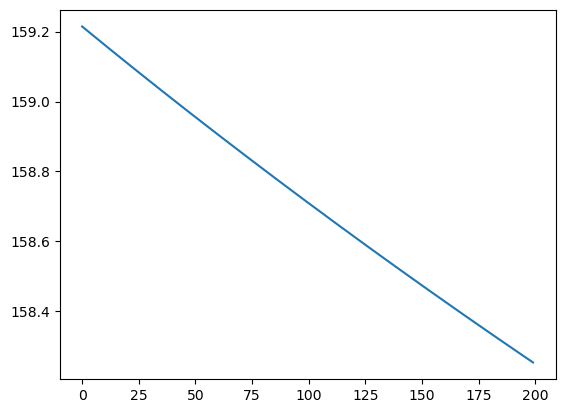

In [151]:
# 绘制目标函数值变化图
plt.plot(result.iloc[:,0], result.iloc[:,1])

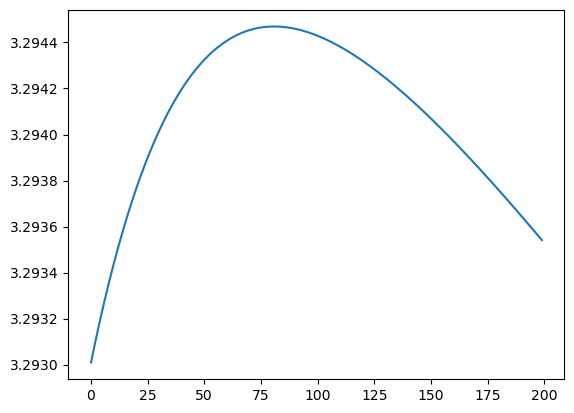

In [152]:
# 绘制测试集RMSE值变化图
plt.plot(result.iloc[:,0], result.iloc[:,2])

In [165]:
# 调参
# 不同的k值
max_loop = 20
Lambda2 = 0.01
k_choice = [10, 50, 100]
result_k = pd.DataFrame(np.zeros([3, 2]))
for i in range(0, 3):
    U = pd.DataFrame(np.full([level, k_choice[i]], 1.0 / k_choice[i], dtype=float))
    V = pd.DataFrame(np.ones([level, k_choice[i]], dtype=float))
    time = 0
    temp_RMSE_test = 0.0
    while time < max_loop:
        DU = dU(Lambda2)
        DV = dV(Lambda2)
        U = U - a * DU
        V = V - a * DV
        temp_J = J(Lambda2)
        temp_RMSE_test = RMSE_test()
        time = time + 1
    result_k.iloc[i, :] = [k_choice[i], temp_RMSE_test]
result_k

,0,1
0,10.0,1.263211
1,50.0,1.908800
2,100.0,2.440023


In [166]:
# 调参
# 不同的lambda值
max_loop = 20
k = 50
U = pd.DataFrame(np.full([level, k], 1.0 / k, dtype=float))
V = pd.DataFrame(np.ones([level, k], dtype=float))
lambda_choice = [0.001, 0.01, 0.1, 1]
result_lambda = pd.DataFrame(np.zeros([4, 2]))
for i in range(0, 4):
    time = 0
    temp_RMSE_test = 0.0
    while time < max_loop:
        DU = dU(lambda_choice[i])
        DV = dV(lambda_choice[i])
        U = U - a * DU
        V = V - a * DV
        temp_J = J(lambda_choice[i])
        temp_RMSE_test = RMSE_test()
        time = time + 1
    result_lambda.iloc[i, :] = [lambda_choice[i], temp_RMSE_test]
result_lambda

,0,1
0,0.001,1.908811
1,0.010,2.430482
2,0.100,2.749934
3,1.000,2.946539


# 4 利用更多信息提高推荐效果

In [187]:
# 读取电影年份和电影名称
f_movie = open('./data/movie_titles.txt')
movie_list = []
pd_movie = f_movie.readlines()
for line in pd_movie:
    temp_list = line.replace('\n', '').split(",")
    temp_list[0] = int(temp_list[0])
    if temp_list[1] == 'NULL':
        temp_list[1] = 2006
    else:
        temp_list[1] = int(temp_list[1])
    movie_list.append(temp_list)

pd_movie_data = pd.DataFrame(movie_list)
pd_movie_data = pd_movie_data.iloc[:,0:3]
pd_movie_data.loc[:,3] = [0] * 17770 # 后续记录评分人数
pd_movie_data.loc[:,4] = [0] * 17770 # 后续记录总评分
pd_movie_data.loc[:,5] = [0] * 17770 # 后续计算平均评分
pd_movie_data

,0,1,2,3,4,5
0,1,2003,Dinosaur Planet,0,0,0
1,2,2004,Isle of Man TT 2004 Review,0,0,0
2,3,1997,Character,0,0,0
3,4,1994,Paula Abdul's Get Up & Dance,0,0,0
4,5,2004,The Rise and Fall of ECW,0,0,0
...,...,...,...,...,...,...
17765,17766,2002,Where the Wild Things Are and Other Maurice Se...,0,0,0
17766,17767,2004,Fidel Castro: American Experience,0,0,0
17767,17768,2000,Epoch,0,0,0
17768,17769,2003,The Company,0,0,0


In [188]:
# 对电影评分取均值
f_train2 = open('./data/netflix_train.txt')
f_train_data2 = f_train2.readlines()
for line in f_train_data2:
    temp_list = line.split(" ")
    pd_movie_data.iloc[int(temp_list[1]) - 1, 3] = pd_movie_data.iloc[int(temp_list[1]) - 1, 3] + 1
    pd_movie_data.iloc[int(temp_list[1]) - 1, 4] = pd_movie_data.iloc[int(temp_list[1]) - 1, 4] + int(temp_list[2])

for i in range(0, 10000):
    pd_movie_data.iloc[i, 5] = pd_movie_data.iloc[i, 4] / pd_movie_data.iloc[i, 3]

pd_movie_data

,0,1,2,3,4,5
0,1,2003,Dinosaur Planet,129,459,3.558140
1,2,2004,Isle of Man TT 2004 Review,13,21,1.615385
2,3,1997,Character,292,970,3.321918
3,4,1994,Paula Abdul's Get Up & Dance,20,44,2.200000
4,5,2004,The Rise and Fall of ECW,153,485,3.169935
...,...,...,...,...,...,...
17765,17766,2002,Where the Wild Things Are and Other Maurice Se...,0,0,0.000000
17766,17767,2004,Fidel Castro: American Experience,0,0,0.000000
17767,17768,2000,Epoch,0,0,0.000000
17768,17769,2003,The Company,0,0,0.000000


In [197]:
# 基于电影年份推荐：计算年代电影得分情况
max_year = max(pd_movie_data.iloc[:,1])
min_year = max_year
for i in range(0, len(pd_movie_data)):
    if pd_movie_data.iloc[i, 1] != 0 and pd_movie_data.iloc[i, 1] < min_year:
        min_year = pd_movie_data.iloc[i, 1]
print(min_year,max_year)

1896 2005


In [222]:
pd_movie_summary= pd.DataFrame(np.zeros([max_year - min_year + 1, 7]),
                               index= range(min_year, max_year + 1), columns=["0", "1", "2", "3", "4", "5", "平均"])
for i in range(len(pd_movie_data)):
    if pd_movie_data.iloc[i, 1] <= max_year and pd_movie_data.iloc[i, 1] >= min_year:
        pd_movie_summary.loc[pd_movie_data.iloc[i, 1]][round(pd_movie_data.iloc[i, 5])] += 1
for i in range(min_year, max_year + 1):
    temp_sum = 0
    temp_num = 0
    for j in range(0, 6):
        temp_num += pd_movie_summary.loc[i][str(j)]
        temp_sum = temp_sum + pd_movie_summary.loc[i][str(j)] * j
    if temp_sum == 0:
        pd_movie_summary.loc[i]["平均"] = 0.0
    else:
        pd_movie_summary.loc[i]["平均"] = temp_sum / temp_num
pd_movie_summary

,0,1,2,3,4,5,平均
1896,0.0,0.0,0.0,1.0,0.0,0.0,3.000000
1897,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1898,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1899,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1900,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
2001,537.0,0.0,188.0,395.0,63.0,1.0,1.535473
2002,551.0,2.0,206.0,463.0,87.0,1.0,1.645802
2003,546.0,2.0,164.0,451.0,107.0,1.0,1.664831
2004,635.0,1.0,206.0,468.0,124.0,2.0,1.617688


In [224]:
# 基于电影名称的推荐：语言模型
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bignet\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [226]:
# 生成句子token
names = pd_movie_data.iloc[:, 2]
tokenized_names = []
for line in names:
    tokenized_names.append(word_tokenize(line.lower()))
tokenized_names[0:10]

[['dinosaur', 'planet'],
 ['isle', 'of', 'man', 'tt', '2004', 'review'],
 ['character'],
 ['paula', 'abdul', "'s", 'get', 'up', '&', 'dance'],
 ['the', 'rise', 'and', 'fall', 'of', 'ecw'],
 ['sick'],
 ['8', 'man'],
 ['what', 'the', '#', '$', '*', '!', 'do', 'we', 'know', '!', '?'],
 ['class', 'of', 'nuke', "'em", 'high', '2'],
 ['fighter']]

In [227]:
# 计算余弦相似度
def cosim(np1, np2):
    np12 = np.dot(np1, np2)
    np1_2 = np.linalg.norm(np1) * np.linalg.norm(np2)
    return np12 / np1_2

In [229]:
#Doc2Vec
tagged_names = [TaggedDocument(name, [i]) for i, name in enumerate(tokenized_names)]
tagged_names[0:10]

[TaggedDocument(words=['dinosaur', 'planet'], tags=[0]),
 TaggedDocument(words=['isle', 'of', 'man', 'tt', '2004', 'review'], tags=[1]),
 TaggedDocument(words=['character'], tags=[2]),
 TaggedDocument(words=['paula', 'abdul', "'s", 'get', 'up', '&', 'dance'], tags=[3]),
 TaggedDocument(words=['the', 'rise', 'and', 'fall', 'of', 'ecw'], tags=[4]),
 TaggedDocument(words=['sick'], tags=[5]),
 TaggedDocument(words=['8', 'man'], tags=[6]),
 TaggedDocument(words=['what', 'the', '#', '$', '*', '!', 'do', 'we', 'know', '!', '?'], tags=[7]),
 TaggedDocument(words=['class', 'of', 'nuke', "'em", 'high', '2'], tags=[8]),
 TaggedDocument(words=['fighter'], tags=[9])]

In [237]:
sen_model = Doc2Vec(tagged_names, vector_size=10, window=2, min_count=1, epochs=5)
sen_model.wv.key_to_index

{'the': 0,
 ':': 1,
 'of': 2,
 "'s": 3,
 'and': 4,
 'season': 5,
 'in': 6,
 'a': 7,
 '2': 8,
 '1': 9,
 '.': 10,
 'to': 11,
 '&': 12,
 'live': 13,
 'vol': 14,
 '3': 15,
 'on': 16,
 '!': 17,
 '/': 18,
 'for': 19,
 'series': 20,
 'bonus': 21,
 'material': 22,
 'man': 23,
 'love': 24,
 'from': 25,
 'with': 26,
 'at': 27,
 'world': 28,
 'my': 29,
 'i': 30,
 'best': 31,
 'night': 32,
 'collection': 33,
 'edition': 34,
 'you': 35,
 'story': 36,
 'movie': 37,
 'life': 38,
 'dead': 39,
 'house': 40,
 'it': 41,
 'american': 42,
 '4': 43,
 'time': 44,
 'me': 45,
 'new': 46,
 'last': 47,
 'big': 48,
 "'": 49,
 'all': 50,
 'blue': 51,
 'little': 52,
 'war': 53,
 'lost': 54,
 'special': 55,
 'who': 56,
 'dragon': 57,
 'show': 58,
 'black': 59,
 'king': 60,
 'star': 61,
 'ii': 62,
 '(': 63,
 'great': 64,
 'red': 65,
 ')': 66,
 'is': 67,
 'day': 68,
 'one': 69,
 'by': 70,
 'street': 71,
 'death': 72,
 'city': 73,
 'dark': 74,
 'girl': 75,
 '5': 76,
 'an': 77,
 'double': 78,
 'out': 79,
 'adventures': 

In [233]:
# 生成名字向量
temp_sentence = word_tokenize(pd_movie_data.iloc[0, 2])
temp_sentence_vector = sen_model.infer_vector(temp_sentence)
temp_sentence_vector

array([-0.03623721,  0.04991513,  0.0383601 ,  0.03759486,  0.02636898,
       -0.03551999, -0.01462611, -0.00114712,  0.02244701,  0.00124047],
      dtype=float32)

In [235]:
movie_name_vector_list = []
for i in range(0, len(pd_movie_data)):
    temp_sentence = word_tokenize(pd_movie_data.iloc[i, 2])
    temp_sentence_vector = sen_model.infer_vector(temp_sentence)
    movie_name_vector_list.append([i, temp_sentence, temp_sentence_vector])
pd_movie_name_vecotr = pd.DataFrame(movie_name_vector_list)
pd_movie_name_vecotr

,0,1,2
0,0,"[Dinosaur, Planet]","[-0.03623721, 0.049915127, 0.0383601, 0.037594..."
1,1,"[Isle, of, Man, TT, 2004, Review]","[-0.024802309, -0.0092518665, -0.006435116, 0...."
2,2,[Character],"[-0.04161025, 0.034679003, 0.0401221, -0.03762..."
3,3,"[Paula, Abdul, 's, Get, Up, &, Dance]","[-0.012539527, 0.028160268, -0.048323732, -0.0..."
4,4,"[The, Rise, and, Fall, of, ECW]","[-0.014510149, 0.016646124, 0.038320985, 0.010..."
...,...,...,...
17765,17765,"[Where, the, Wild, Things, Are, and, Other, Ma...","[0.019798193, -0.03305091, 0.044560794, -0.042..."
17766,17766,"[Fidel, Castro, :, American, Experience]","[-0.011565074, 0.0029010712, 0.04775446, 0.007..."
17767,17767,[Epoch],"[0.026661694, 0.013470513, 0.033332564, 0.0094..."
17768,17768,"[The, Company]","[-0.0135359345, 0.038479857, 0.023260284, 0.02..."
